# ENPH 213 - Week 2 Lab
In this lab, we will be working with Numerical Integration while continuing to develop your Python skills.

There is an accompanying file (ENPH213_Lab2_Hysteresis-Data.csv) that should be downloaded to the same folder as this notebook.  When you are finished, please rename this notebook to LastName_ENPH213_Lab2, where LastName is your last name.  Submit that file to onQ.

## Part 1
Load the data from "ENPH213_Lab2_Hysteresis-Data.csv", and plot the curve of v$_y$ as a function of v$_x$.  Before you being, open the file in a text editor so that you know the format of the data and can manipulate it properly.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

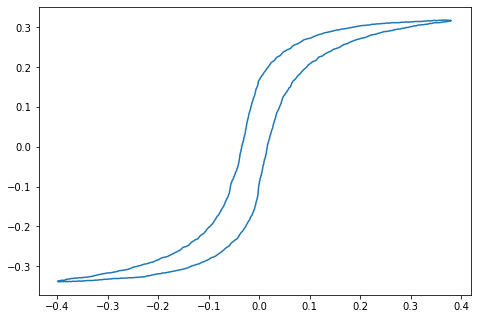

In [17]:
part1data = np.loadtxt("ENPH213_Lab2_Hysteresis-Data.csv", skiprows = 1, delimiter = ',') # skips first row and commas
part1data
vx = part1data[:,1] # only takes second column
vy = part1data[:,2] # only takes third column
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(vx,vy)

## Part 2
In the Part 3, you will be asked to find the area between the two curves.  In a few sentences, first indicate what algorithm you would like to use and why.  Then, describe how you will get the area considering how the data is presented.

I will use Simpsons Rule because of its simplicity and my familiarity with it. I will have to split the data into 
two different arrays to prevent overlap and then calculate the area under the two separate curves and then subtract them afterwards to find total area.

## Part 3
Create a function myIntFunc(x,y) that calculates the area of a hysteresis curve, such as the one you plotted above, where x and y are the input vectors of the x- and y-axes, respectively.  Of note, comment on what form the vectors should take to have the function operate properly.  Have the function output the area. (Hint: my value was in the range 0.04 and 0.05)

In [48]:
vx1 = vx[0:334] # midpoint when x starts decreasing 
vx2 = vx[-1:333:-1] # data is decreasing so it is reversed for simplicity

vy1 = vy[0:334] # have to split y as well 
vy2 = vy[-1:333:-1] # have to reverse to keep with x values


def myIntFunction(x,y):
    int = 0 #initialize to 0
    for i in range(0,len(x)-2,2): #start at 0, go until two less than total length, increments of 2
        h = (x[i+2]-x[i])*0.5 # finding h by averaging two endpoints
        int = int + (y[i]+4*y[i+1]+y[i+2])*(h/3) # simpsons 1 4 1 rule for 
    return int

area1 = myIntFunction(vx1,vy1) #area under first half of data values
area2 = myIntFunction(vx2,vy2) #area under second half of data values

areatot = abs(area1-area2) # total area between data values
print(areatot)
            


0.046578639216666745


## Part 4

One interesting function that appears often and exists as a integral function is the Guass Error Function or more commonly simply the Error Function.  It is written as erf(x) and has the form:

$ erf(x) = \frac{2}{\sqrt\pi} \int_0^x e^{-z^2} dz$

Write a function myErf(x, N) using Simpson's 1/3 Rule (itself a separate function) to evaluate the Error Function for an input x and a number of points to evaluate N.  

Then evaluate myErf for x = 0.213, but determine how many points N are needed to be within 0.000 01 of the accepted value (Google calculated this for me: 0.2367589703).

In [7]:
def func(x): # define the main function to save time 
    return np.e**(-x**2)

def Simpsons(x1,x2,N): #defining simpsons rule to use for the error function
    int = 0
    h = (x2-x1)/N 
    for i in range(1,N-1,2): # similar process to part 3 
        xi = x1 + h*i
        int = int + func(xi-h) + 4*func(xi) + func(xi+h)
        
    int = int*(h/3)
    return int

def myErf(x,N):
    return (2/(np.sqrt(np.pi)))*Simpsons(0,x,N)

for i in range (2, 30000, 1):
    erf = myErf(0.213, i) #run the error function through each i 
    diff = abs(0.2367589703 - erf)
    if diff < 0.00001: # breaks once the value is within this number
        break
        break
print(i, " points N are needed get within", diff, " of the accepted value")

22969  points N are needed get within 9.999765653356807e-06  of the accepted value


## Part 5

Using Simpson's Rule, calculate the following double integral:

$ \Omega  = \int_{y=0}^{\pi/2} \int_{x=0}^{\pi} \sqrt{x+y} \sin(x) \cos(y) dx dy $

Using N = 101 points in each direction, my calculation for $\Omega$ was between 2.0 and 3.0.  Aim to do this question using a matrix of weighting coefficients.  Full marks will be given if no loops are used.

In [3]:
def func(x,y):
    return np.sqrt(x+y)*np.sin(x)*np.cos(y) #main function that is being integrated
N=101
x0=0
x1=np.pi
y0=0
y1=np.pi/2 #using these as the limits of the integration

hx = abs((x1-x0)/(N-1))
hy = abs((y1-y0)/(N-1)) 

x = np.linspace(x0,x1,N)
y = np.linspace(y0,y1,N) #arrays of x and y values through limits of integration

funcpoints = func(x,y)

WeightedMtx = np.ones(N)
WeightedMtx[1:N:2] = 4
WeightedMtx[2:-2:2] = 2 #weighted matrix with values of simpsons rule 
WeightedMtx = np.outer(WeightedMtx,WeightedMtx)
print(WeightedMtx)

int = 0 
int = (hx*hy)/9*np.sum(funcpoints*WeightedMtx) #multiplying the two functions together
int

[[ 1.  4.  2. ...  2.  4.  1.]
 [ 4. 16.  8. ...  8. 16.  4.]
 [ 2.  8.  4. ...  4.  8.  2.]
 ...
 [ 2.  8.  4. ...  4.  8.  2.]
 [ 4. 16.  8. ...  8. 16.  4.]
 [ 1.  4.  2. ...  2.  4.  1.]]


2.8700438107223696

## Part 6: See separate notebook

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

Teammates helped a lot with part 4 and properly using simpsons with weighted matrix. Had to look for a lot of help for most of 6